In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk as nlp
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

import warnings
warnings.filterwarnings("ignore")

# MS4H05 - NLP Coursework

This notebook highlights the investigation and analysis into twitter tweets pertaining to the SARS-CoV-19 pandemic. These tweets are found in the 'CMU-MisCOV19.csv' file.

In [2]:
df = pd.read_csv('CMU-MisCOV19.csv')

df.head()

,status_id,text,annontation
0,0,"PAGS PARODY! Plus, Joe talks coronavirus and h...",irrelevant
1,1,#coronavirus shows that racists have absolutel...,irrelevant
2,2,@Laura1206 @ShitChester I would expect front l...,irrelevant
3,3,The coronavirus is not only affecting the way ...,irrelevant
4,4,I hope your father recovers from the virus as ...,politics


The table contains the row id, the text of the tween and the classification of the tweet which is one of the 17 listed below.

1. Irrelevant
2. Conspiracy
3. True Treatment
4. True Prevention
5. Fake Cure
6. Fake Treatment
7. False Fact or Prevention
8. Correction/Calling out
9. Sarcasm/Satire
10. True Public Health Response
11. False Public Health Response
12. Politics
13. Ambiguous/Difficult to classify
14. Commercial Activity or Promotion
15. Emergency Response
16. News
17. Panic Buying

This notebook is split into 3 sections.

Section 1, text mining, will highlight the preprocessing techniques used to prepare the data for section 2 and 3. The text will be cleaned using stopwords, tokanized and then cleaned to prepare for sentiment analysis and then text classification.

Explination of each process and step will be highlighted within each section.

---
## 1. Text Mining

Before analysis can be run on the data, first, we must pre-process it so that the computer understands what it is we are asking it to analyse.

In this section, stopwords, tokanization and lemmatization will be used to prepare the data for further analysis. In addition, some early analysis will be done to have a initial look at what our text contains.

### Stopwords & Tokanization

What are stopwords and why do we need them removed? Tokanization?

In this first section, stopwording and tokanization will be performed on the data. Tokanization is the first step we must take in our pre-processing. It splits our text string into individual tokens. The difference between the base text and the tokanized text can be seen 3 cells down. Each word has been seperated which allows for stopwords and further processing to be performed.

Stopwords are words that we want automatically removed from our text. For example, if someone has used a combination of alpha and numerical text, such as "b4 u m8" which can be understood as "before you mate" this must be removed. The text can be understood by some people, however, the program will have great difficulty drawing any meaningful sentiment or meaning behind this.

In [3]:
# Changes text column to string and removes any uppercase wording.

df['text'] = df['text'].astype(str).str.lower()

In [4]:
#Tokenizing our text but also keeping mentions (e.g '@joetalkshow') 
# incase we want to look at these later

regexp = RegexpTokenizer('\w+')
regmention = RegexpTokenizer('@\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df['text_mentions']=df['text'].apply(regmention.tokenize)

In [5]:
df[['text', 'text_token']].head()

,text,text_token
0,"pags parody! plus, joe talks coronavirus and h...","[pags, parody, plus, joe, talks, coronavirus, ..."
1,#coronavirus shows that racists have absolutel...,"[coronavirus, shows, that, racists, have, abso..."
2,@laura1206 @shitchester i would expect front l...,"[laura1206, shitchester, i, would, expect, fro..."
3,the coronavirus is not only affecting the way ...,"[the, coronavirus, is, not, only, affecting, t..."
4,i hope your father recovers from the virus as ...,"[i, hope, your, father, recovers, from, the, v..."


In [6]:
# Importing stopwords so that we can remove them from our dataset before analysis
nlp.download('stopwords')

from nltk.corpus import stopwords

# Import the list of english stopwords
stopwords = nlp.corpus.stopwords.words("english")

# Extending the list of stopwords to include https. 
# This is because it does not contain any useful information.

my_stopwords = ['https']
stopwords.extend(my_stopwords)

#Removing stop words and assigning to a new column
df['text_token'] = df['text_token'].apply(lambda x: 
                                          [item for item in x if item not 
                                           in stopwords])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Now that we've pulled the text apart and removed the unnecessary 
# text we can put it back together.

df['clean_text'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

df[['text', 'text_token', 'clean_text']].head()

,text,text_token,clean_text
0,"pags parody! plus, joe talks coronavirus and h...","[pags, parody, plus, joe, talks, coronavirus, ...",pags parody plus joe talks coronavirus special...
1,#coronavirus shows that racists have absolutel...,"[coronavirus, shows, racists, absolutely, 2, m...",coronavirus shows racists absolutely much time...
2,@laura1206 @shitchester i would expect front l...,"[laura1206, shitchester, would, expect, front,...",laura1206 shitchester would expect front line ...
3,the coronavirus is not only affecting the way ...,"[coronavirus, affecting, way, live, also, dram...",coronavirus affecting way live also dramatical...
4,i hope your father recovers from the virus as ...,"[hope, father, recovers, virus, soonas, possib...",hope father recovers virus soonas possible fam...


### Frequency distribution

Performing a frequency distribution will allow us to see what the most popular values in our text column is. This can help with preparing for future analysis by removing words with a very low frequency, as they have little to no bearing on the meaning or value of a string of text.

In [8]:
nlp.download('punkt')

all_words = ' '.join([word for word in df['clean_text']])

tokenized_words = nlp.tokenize.word_tokenize(all_words)

fdist = FreqDist(tokenized_words)
fdist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({'coronavirus': 1802, 'covid': 1437, 'covid19': 649, 'cure': 578, 'people': 575, 'bleach': 527, 'immune': 451, 'trump': 409, 'bioweapon': 327, 'hydroxychloroquine': 309, ...})

Next we will remove all the words that appear less than 5 times as low frequency of words makes it far harder to evaluate their sentiment and classification.

In [9]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 5]))

In [10]:
df[['text', 'text_token', 'clean_text', 'text_string_fdist']].head()

,text,text_token,clean_text,text_string_fdist
0,"pags parody! plus, joe talks coronavirus and h...","[pags, parody, plus, joe, talks, coronavirus, ...",pags parody plus joe talks coronavirus special...,plus joe talks coronavirus special peter new book
1,#coronavirus shows that racists have absolutel...,"[coronavirus, shows, racists, absolutely, 2, m...",coronavirus shows racists absolutely much time...,coronavirus shows absolutely much time hands h...
2,@laura1206 @shitchester i would expect front l...,"[laura1206, shitchester, would, expect, front,...",laura1206 shitchester would expect front line ...,would expect front line staff risk coronavirus...
3,the coronavirus is not only affecting the way ...,"[coronavirus, affecting, way, live, also, dram...",coronavirus affecting way live also dramatical...,coronavirus affecting way live also affecting ...
4,i hope your father recovers from the virus as ...,"[hope, father, recovers, virus, soonas, possib...",hope father recovers virus soonas possible fam...,hope father virus possible family get infected...


### Lemmatization

Lemmatization is the act of reverting inflected words to their base forms based on the sentance structure they are found within. An example of lemmitization would be the word "bought" and "buying" both are inflected examples of the word "buy". However, lemmatization goes a step further than its companion stemming, for example "better" is a word in its own right and would be ignored by stemming, however, with lemmatization the lemma of "better" is "good". 

In [11]:
nlp.download('wordnet')
nlp.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [13]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

df.is_equal.value_counts()

True     3641
False       1
Name: is_equal, dtype: int64

We check whether both columns are equal to ensure that the lemmitization has correctly lemmatized each row and that there are none or few with no lemmatizable words.

### Frequently appearing words 

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
import wordcloud

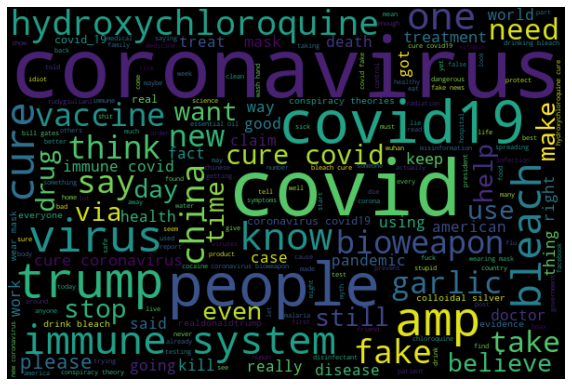

In [16]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

From the word cloud we can see that the most common (and most obvious) words are pertaining to Coronavirus. It is also clear to see all the words pertaining to missinformation or conspiracies such as bioweapon, bleach and hydroxychloroquine.

Lets have a closer look at our most common terms by plotting the top 10.

In [17]:
words = nlp.word_tokenize(all_words_lem)
fd = FreqDist(words)

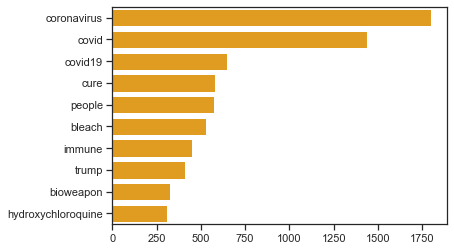

In [18]:
# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='orange');

In this section, I've highlighted the methods used to clean, tokenize and lamitize our data. The next step is to perform Sentiment analysis which is performed in section 2.

---
## 2. Sentiment analysis

Sentiment analysis is the process of extracting the polarity of a text string. This allows for the understanding of the sentiment behind a tweet. For example, someone using a large number of negative words such as "rubbish", "angry" and profanities would be given a negative sentiment value due to the use of these negative words.

However, it is important to recognise that a text string could contain negative, neutral and positive words, this means strings may be negative despite containing some positive words.

In [19]:
nlp.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Polarity

Polarity determines the sentiment of a text, whether it be positive, negative or neutral. We can apply this directly to the lemmatized text using the nltk modules "SentimentIntensityAnalyzer" and apply it using the pandas ".apply" function.  

In [20]:
# Applying a polarity score to each of our lemitized rows

df['polarity'] = df['text_string_lem'].apply(lambda x: 
                                             analyzer.polarity_scores(x))

df[['text', 'text_string_lem', 'polarity']].head()

,text,text_string_lem,polarity
0,"pags parody! plus, joe talks coronavirus and h...",plus joe talks coronavirus special peter new book,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp..."
1,#coronavirus shows that racists have absolutel...,coronavirus shows absolutely much time hands h...,"{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'comp..."
2,@laura1206 @shitchester i would expect front l...,would expect front line staff risk coronavirus...,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp..."
3,the coronavirus is not only affecting the way ...,coronavirus affecting way live also affecting ...,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp..."
4,i hope your father recovers from the virus as ...,hope father virus possible family get infected...,"{'neg': 0.475, 'neu': 0.423, 'pos': 0.102, 'co..."


As can be seen above the text has now been analyzed and been given a polarity score broken up into its seperate components. This can be compounded to give us an overall score ranging from -1 to 1 ranging from negative to positive respectively.

In [21]:
df

,status_id,text,annontation,text_token,text_mentions,clean_text,text_string_fdist,text_string_lem,is_equal,polarity
0,0,"pags parody! plus, joe talks coronavirus and h...",irrelevant,"[pags, parody, plus, joe, talks, coronavirus, ...",[@joetalkshow],pags parody plus joe talks coronavirus special...,plus joe talks coronavirus special peter new book,plus joe talks coronavirus special peter new book,True,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp..."
1,1,#coronavirus shows that racists have absolutel...,irrelevant,"[coronavirus, shows, racists, absolutely, 2, m...",[],coronavirus shows racists absolutely much time...,coronavirus shows absolutely much time hands h...,coronavirus shows absolutely much time hands h...,True,"{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'comp..."
2,2,@laura1206 @shitchester i would expect front l...,irrelevant,"[laura1206, shitchester, would, expect, front,...","[@laura1206, @shitchester]",laura1206 shitchester would expect front line ...,would expect front line staff risk coronavirus...,would expect front line staff risk coronavirus...,True,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp..."
3,3,the coronavirus is not only affecting the way ...,irrelevant,"[coronavirus, affecting, way, live, also, dram...",[],coronavirus affecting way live also dramatical...,coronavirus affecting way live also affecting ...,coronavirus affecting way live also affecting ...,True,"{'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'comp..."
4,4,i hope your father recovers from the virus as ...,politics,"[hope, father, recovers, virus, soonas, possib...",[],hope father recovers virus soonas possible fam...,hope father virus possible family get infected...,hope father virus possible family get infected...,True,"{'neg': 0.475, 'neu': 0.423, 'pos': 0.102, 'co..."
...,...,...,...,...,...,...,...,...,...,...
3637,3637,da fark is wrong with these people?!\n\nhttps:...,calling out or correction,"[da, fark, wrong, people, co, dxmbsobsaq]",[],fark wrong people dxmbsobsaq,wrong people,wrong people,True,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp..."
3638,3638,doctor finds cure to covid-19 (without vaccine...,fake cure,"[doctor, finds, cure, covid, 19, without, vacc...",[@youtube],doctor finds cure covid without vaccine 60dqdo...,doctor finds cure covid without vaccine via yo...,doctor finds cure covid without vaccine via yo...,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3639,3639,i can’t believe people legitimately think that...,calling out or correction,"[believe, people, legitimately, think, covid, ...",[],believe people legitimately think covid govern...,believe people think covid government control ...,believe people think covid government control ...,True,"{'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'comp..."
3640,3640,"...(wrong with trump continues), \n-will push ...",politics,"[wrong, trump, continues, push, pressure, gove...",[],wrong trump continues push pressure governors ...,wrong trump continues push pressure governors ...,wrong trump continues push pressure governors ...,True,"{'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'comp..."


In [22]:
# Cleaning up our columns and splitting polarity into its 
# seperate features and calculating the compound of the three values.

df = pd.concat([df.drop(['status_id'], axis=1),
    df['polarity'].apply(pd.Series)], axis=1)

In [23]:
df[['text', 'neg', 'neu', 'pos', 'compound']].head()

,text,neg,neu,pos,compound
0,"pags parody! plus, joe talks coronavirus and h...",0.000,0.722,0.278,0.4019
1,#coronavirus shows that racists have absolutel...,0.198,0.802,0.000,-0.5719
2,@laura1206 @shitchester i would expect front l...,0.139,0.861,0.000,-0.2732
3,the coronavirus is not only affecting the way ...,0.358,0.642,0.000,-0.5994
4,i hope your father recovers from the virus as ...,0.475,0.423,0.102,-0.8910


Now we have the compounded value based on each of the seperate values calculated for negative (neg), neutral (neu) and positive (pos).

Next we will apply a sentiment to each row based on their compound values. The documentation I have been using states that a section of text is neutral if its value is equal to 0, however, as the compound value is made up of 3 values it is very unlikely that any row would be categorized as neutral. Due to this for my work I will alter my sentiment thresholds and add an additional 2 sentiments ranging from extremely negative to extremely positive.

In [24]:
df['sentiment'] = df['compound'].apply(lambda x: 'extremely positive' if x >=0.75
                                       else 'positive' if 0.35 < x < 0.75
                                       else 'neutral' if -0.35 <= x <= 0.35 
                                       else 'negative' if -0.75 < x < -0.35
                                      else 'extremely negative')
df[['text', 'compound', 'sentiment']].head()

,text,compound,sentiment
0,"pags parody! plus, joe talks coronavirus and h...",0.4019,positive
1,#coronavirus shows that racists have absolutel...,-0.5719,negative
2,@laura1206 @shitchester i would expect front l...,-0.2732,neutral
3,the coronavirus is not only affecting the way ...,-0.5994,negative
4,i hope your father recovers from the virus as ...,-0.8910,extremely negative


I feel this decision was the right one as with line 2 for example,

Row 2: "I would expect front line staff to be more of a risk of having coronavirus than the average person. Hence why there is talk of nurses etc having to stay at work if they have it or sticking them in a commandeered hotel"

This is not really positive or negative and with a compound value of -0.27 it would have been classified as negative sentiment which in my opinion would be an incorrect classification.

### Analyze & visualize

In [25]:
# Lets have a look at our most positive tweet row.

df.loc[df['compound'].idxmax()].values

array(['the ph value of corona virus is between 5.5 to 8.5. so, \n1-we have to eat the things which have more ph value like lemon (10 ph value), avacada (15.6 ph value), garlic (13.2 ph value), mango (8.7 ph value), pineapple (12.7 ph value), etc. #covid_19 #health  @narendramodi @who',
       'false fact or prevention',
       list(['ph', 'value', 'corona', 'virus', '5', '5', '8', '5', '1', 'eat', 'things', 'ph', 'value', 'like', 'lemon', '10', 'ph', 'value', 'avacada', '15', '6', 'ph', 'value', 'garlic', '13', '2', 'ph', 'value', 'mango', '8', '7', 'ph', 'value', 'pineapple', '12', '7', 'ph', 'value', 'etc', 'covid_19', 'health', 'narendramodi']),
       list(['@narendramodi', '@who']),
       'value corona virus eat things value like lemon value avacada value garlic value mango value pineapple value etc covid_19 health narendramodi',
       'value corona virus eat things value like lemon value value garlic value value value etc covid_19 health',
       'value corona virus eat things

It is clear that, in terms of sentiment, this tweet is not in anyway negative other than the fact it is false information.

In [26]:
# Lets have a look at our most negative tweet row.

df.loc[df['compound'].idxmin()].values

array(['everybody say “that covid shit fake bro wtf that shit just conspiracy” and now i’m here at home sick as fuck because family don’t wanna listen y’all be tryna get rid of the wrong people 🚮🚮🚮 fuckin listen bro this shit no joke y’all don’t even understand how bad this shut hurt https://t.co/xb7izz0bq6',
       'calling out or correction',
       list(['everybody', 'say', 'covid', 'shit', 'fake', 'bro', 'wtf', 'shit', 'conspiracy', 'home', 'sick', 'fuck', 'family', 'wanna', 'listen', 'tryna', 'get', 'rid', 'wrong', 'people', 'fuckin', 'listen', 'bro', 'shit', 'joke', 'even', 'understand', 'bad', 'shut', 'hurt', 'co', 'xb7izz0bq6']),
       list([]),
       'everybody say covid shit fake bro wtf shit conspiracy home sick fuck family wanna listen tryna get rid wrong people fuckin listen bro shit joke even understand bad shut hurt xb7izz0bq6',
       'everybody say covid shit fake bro wtf shit conspiracy home sick fuck family listen get rid wrong people fuckin listen bro shit joke ev

Well this individual is clearly feeling and speaking negatively and with an almsost completely negative compound score of -0.99 it is clear the sentiment analysis did its job.

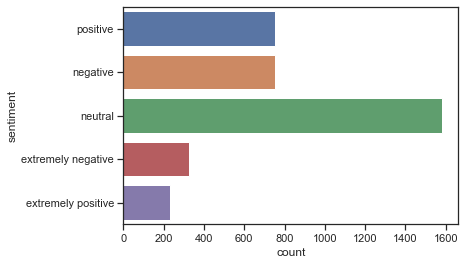

In [27]:
sns.countplot(y='sentiment', 
             data=df
             );

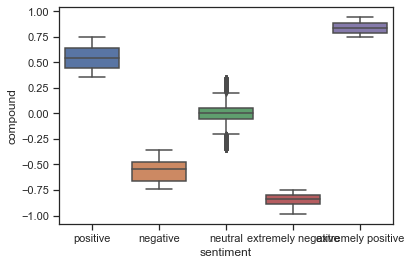

In [28]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment', 
            data=df);

## 3. Text Classification

Text classification can be performed to extract the value behind a text string.

Before classification can be performed the text must be cleaned and lamitized. This has been performed above in both section 1 & 2. The next task is to alter the classification already given into information and misinformation.

In [29]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

This function was taken from Sams support session. It allows for multiple classification techniques to be applied to our data at once.

I hope you don't mind Sam but this function works too well to no use :)

In [31]:
def run_model(model_name):
    if model_name == 'Logistic Regression':
        model = LogisticRegression()
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100)
    elif model_name == 'Multinomial Naive Bayes':
        model = MultinomialNB()
    elif model_name == 'Linear SVC':
        model = LinearSVC() 
    elif model_name == 'XGBoost':
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=0.1, random_state=0)

    oneVsRest = OneVsRestClassifier(model)
    oneVsRest.fit(xtrain_tfidf, y_train)
    y_pred = oneVsRest.predict(xtest_tfidf)
    
    
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    cm = confusion_matrix(y_test, y_pred)
    sns.set_context('talk')
    plt.figure(figsize=(30,30))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(model_name)
    plt.show()

    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2)),
         ]))

In [32]:
df_classify = df[['text', 'annontation', 'clean_text', 'text_string_lem', 'compound', 'sentiment']]

In [33]:
df_classify.head()

,text,annontation,clean_text,text_string_lem,compound,sentiment
0,"pags parody! plus, joe talks coronavirus and h...",irrelevant,pags parody plus joe talks coronavirus special...,plus joe talks coronavirus special peter new book,0.4019,positive
1,#coronavirus shows that racists have absolutel...,irrelevant,coronavirus shows racists absolutely much time...,coronavirus shows absolutely much time hands h...,-0.5719,negative
2,@laura1206 @shitchester i would expect front l...,irrelevant,laura1206 shitchester would expect front line ...,would expect front line staff risk coronavirus...,-0.2732,neutral
3,the coronavirus is not only affecting the way ...,irrelevant,coronavirus affecting way live also dramatical...,coronavirus affecting way live also affecting ...,-0.5994,negative
4,i hope your father recovers from the virus as ...,politics,hope father recovers virus soonas possible fam...,hope father virus possible family get infected...,-0.8910,extremely negative


### Classification altering

Below it can be seen that there are multiple different classifications given in our dataset. 

These will be changed to information or mis-information.

In [34]:
df_classify.value_counts('annontation')

annontation
calling out or correction           1193
conspiracy                           510
politics                             438
sarcasm or satire                    397
false fact or prevention             253
true prevention                      160
true public health response          151
ambiguous or hard to classify        113
irrelevant                           109
fake cure                             92
news                                  92
panic buying                          65
commercial activity or promotion      29
fake treatment                        21
emergency                             16
false public health response           3
dtype: int64

In [35]:
df_classify['annontation'].replace(['emergency'], 'information', inplace=True)
df_classify['annontation'].replace(['news'], 'information', inplace=True)
df_classify['annontation'].replace(['commercial activity or promotion'], 'information', inplace=True)
df_classify['annontation'].replace(['calling out or correction'], 'information', inplace=True)
df_classify['annontation'].replace(['politics'], 'information', inplace=True)
df_classify['annontation'].replace(['true prevention'], 'information', inplace=True)
df_classify['annontation'].replace(['true public health response'], 'information', inplace=True)
df_classify['annontation'].replace(['panic buying'], 'information', inplace=True)

df_classify['annontation'].replace(['fake treatment'], 'mis-information', inplace=True)
df_classify['annontation'].replace(['conspiracy'], 'mis-information', inplace=True)
df_classify['annontation'].replace(['false fact or prevention'], 'mis-information', inplace=True)
df_classify['annontation'].replace(['fake cure'], 'mis-information', inplace=True)
df_classify['annontation'].replace(['false public health response'], 'mis-information', inplace=True)

df_classify['annontation'].replace(['ambiguous or hard to classify'], 'other', inplace=True)
df_classify['annontation'].replace(['irrelevant'], 'other', inplace=True)
df_classify['annontation'].replace(['sarcasm or satire'], 'other', inplace=True)

In [36]:
df_classify.value_counts('annontation')

annontation
information        2144
mis-information     879
other               619
dtype: int64

From above, it can be seen that there is an additional classification called 'other', the reason for this is that there are some tweets that are either unclassified, irrelevant or sarcasm/satire which wouldn't be classed as information or not without further analysis.

Now that we have cleaned up the classifications now we can alter them into numeric values so that the classification modules can accurately class them. Before this we will remove the 'other' classification.

In [37]:
df_classify = df_classify[df_classify['annontation'] != 'other']

df_classify['Annontation_ID'] = df_classify['annontation'].factorize()[0]

category_ids = df_classify[['annontation', 'Annontation_ID']].drop_duplicates(
    ).sort_values('Annontation_ID')

df_classify.drop_duplicates(subset=['annontation', 'text'], inplace=True)

df_classify[['text', 'annontation', 'Annontation_ID']]

,text,annontation,Annontation_ID
4,i hope your father recovers from the virus as ...,information,0
5,delhi hc restrains publication of certain adve...,information,0
6,china confirms new coronavirus as it investiga...,information,0
7,health authorities have identified a new coron...,information,0
8,chinese scientists believe the mysterious pneu...,information,0
...,...,...,...
3637,da fark is wrong with these people?!\n\nhttps:...,information,0
3638,doctor finds cure to covid-19 (without vaccine...,mis-information,1
3639,i can’t believe people legitimately think that...,information,0
3640,"...(wrong with trump continues), \n-will push ...",information,0


<AxesSubplot:xlabel='annontation'>

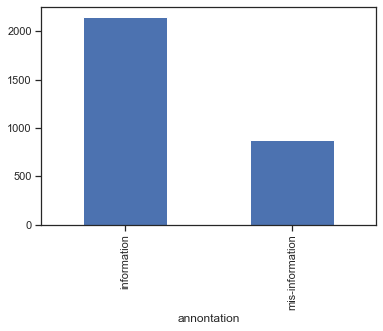

In [38]:
df_classify.groupby('annontation').annontation.count().plot.bar(ylim=0)

### Classification

Now that we have organised the classification and removed all irrelevant rows we can classify our tweets. First the lemanized text must be vectorised which will allow the classification modules to compare the vector values of different words in the test set.

The rows will then be split into training and test for learning and accuracy scoring.

Finally, the split data will be run through the various classifiers and their accuracies compared to find the best model.

In [39]:
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2), use_idf=True)

features = tfidf_vec.fit_transform(df_classify['text_string_lem']).toarray()

features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X = df_classify.loc[:,'text_string_lem']
y = df_classify.loc[:,'Annontation_ID']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=55)

xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)

xtrain_tfidf

<2718x25125 sparse matrix of type '<class 'numpy.float64'>'
	with 64318 stored elements in Compressed Sparse Row format>

<Figure size 2160x2160 with 0 Axes>

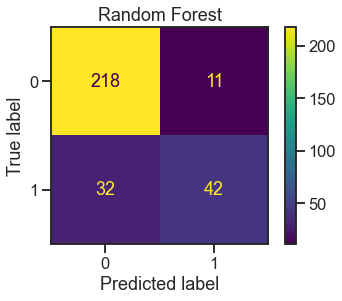

<Figure size 2160x2160 with 0 Axes>

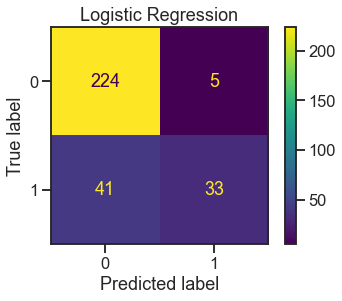

<Figure size 2160x2160 with 0 Axes>

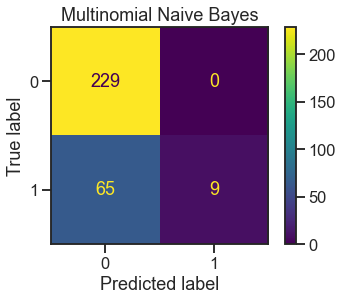

<Figure size 2160x2160 with 0 Axes>

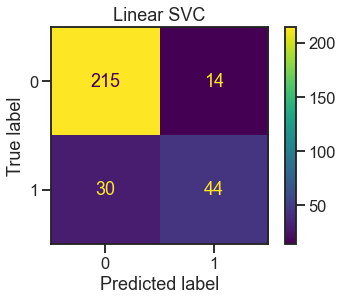

<Figure size 2160x2160 with 0 Axes>

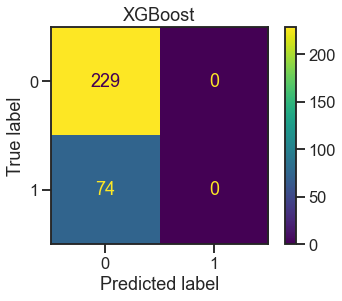

,Model,Test Accuracy,Precision,Recall,F1
0,Random Forest,85.81,0.86,0.86,0.86
1,Logistic Regression,84.82,0.85,0.85,0.85
2,Multinomial Naive Bayes,78.55,0.79,0.79,0.79
3,Linear SVC,85.48,0.85,0.85,0.85
4,XGBoost,75.58,0.76,0.76,0.76


In [41]:
perform_list = []

run_model('Random Forest')
run_model('Logistic Regression')
run_model('Multinomial Naive Bayes')
run_model('Linear SVC')
run_model('XGBoost')

model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[
    ['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]

model_performance

### Results and conclusion

The results above show that the best model was the Random Forest and Linear SVC with matching scores of 85%. This overall is a good accuracy, however, looking at the heat mapping it can be seen that most of this accuracy score has come from the information classification column. With many of the mis-information rows being classified incorrectly.

This misclassification could be due to how the original classifications were put into the information/mis-information columns or down to the content of the rows being similar between the rows. Another method I'd use to try and improve the classification would be to reduce the sample size of the information classification to more closely match that of the mis-information rows as there are over double the number of rows for information as there are for mis-information. 

Overall, I'm happy with the result of this classification and feel confident in the quality of this notebook.

Thanks Sam!